# 구현

## 1. 로봇 청소기
https://www.acmicpc.net/problem/14503

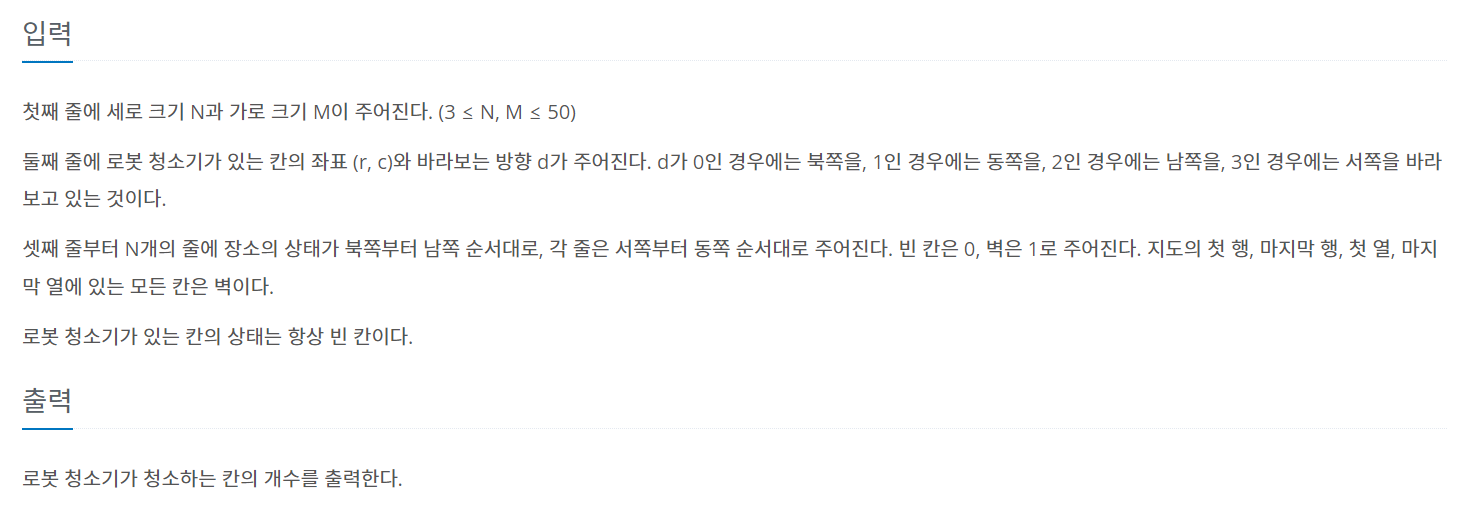

In [3]:
n, m = map(int, input().split())
r, c, d = map(int, input().split())
 
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]
 
graph = []
for i in range(n):
    graph.append(list(map(int, input().split())))
 
def turn_left(): # 방향을 좌측으로 돌리는 함수 0인경우 3이 나온다. 1인 경우는 0이 나온다. 나머지도 마찬가지
    global d
    d = (d-1) % 4
 
count = 1
x, y = r, c
graph[x][y] = 2 # 방문처리를 2로 함
 
while True:
    check = False # 방문한 칸이 있는지 없는지 유뮤를 판단하기 위한 bool형 변수 check
    for i in range(4): # 4방향을 돌며
        turn_left()
        nx = x + dx[d]
        ny = y + dy[d]
        if 0 <= nx < n and 0 <= ny < m: # nx, ny가 그래프를 벗어나지 않는지 확인
            if graph[nx][ny] == 0: # 청소할 수 있는 칸인 경우
                count += 1
                graph[nx][ny] = 2 # 방문처리 해줌
                x, y = nx, ny
                check = True # check를 True로 바꾸어 주어 방문했음을 알림
                break
    if not check: # 4방향을 확인했음에도 청소할 공간이 없는 경우 후진
        nx = x - dx[d]
        ny = y - dy[d]
        if 0 <= nx < n and 0 <= ny < m: # nx, ny가 그래프를 벗어나지 않는지 확인
            if graph[nx][ny] == 2: # 2라면 즉 이미 청소한 칸인경우 후진
                x, y = nx, ny
            elif graph[nx][ny] == 1: # 1인경우 즉 벽인 경우 
                print(count)
                break
        else:
            print(count)
            break

3 3
1 1 0
1 1 1
1 0 1
1 1 1
1


## 2번. 나무 재테크
https://www.acmicpc.net/problem/16235

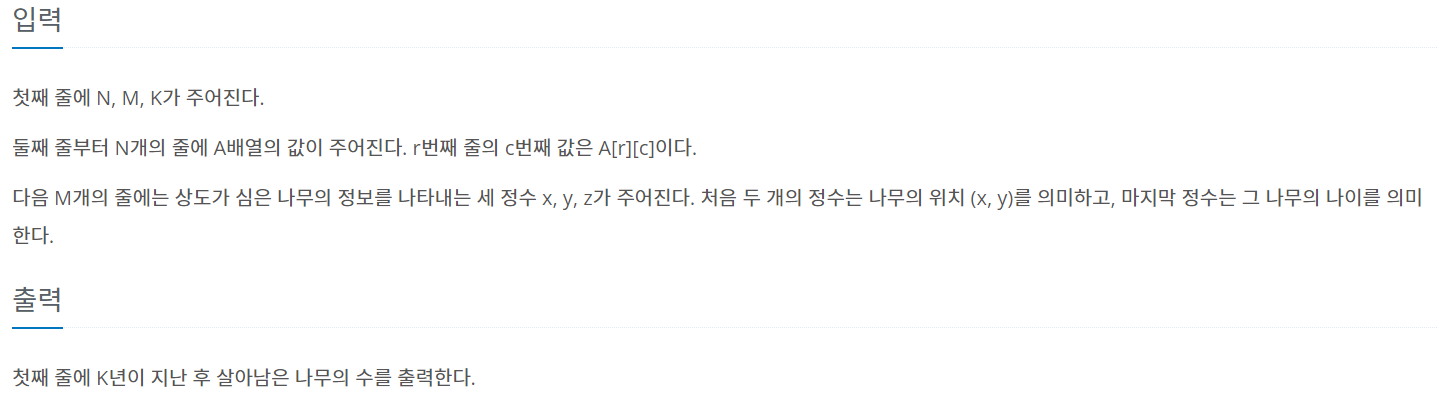

In [2]:
from collections import deque

dxs = [-1, -1, 0, 1, 1, 1, 0, -1]
dys = [0, 1, 1, 1, 0, -1, -1, -1]

# n, m, k 입력
n, m, k = list(map(int, input().split()))

"""
nut : 매년 뿌릴 양분을 담는 2차원 리스트다. 문제에서는 A[i][j] 라고 표기되어있음.
board : board[x][y]는 x, y에 현재 양분이 얼마나 있는지를 담는다.
trees_dict: trees_dict[(x, y)]는 x, y에 있는 현재 나이의 나무들을 담는다.
            deque로 이루어져있어, x, y에 새로 태어나는 나무들은 큐 앞쪽부터 채워진다.
added_nut : added_nut[x][y] 는 x, y 좌표에 죽은 나무들이 남길 양분 값을 담는다.
"""
nut = [list(map(int, input().split())) for _ in range(n)]
board = [[5]*n for _ in range(n)]
trees_dict = {(i,j): deque() for i in range(n) for j in range(n)}

# 초기 나무들의 값을 입력받는다.
for _ in range(m):
    x, y, age = list(map(int, input().split()))
    trees_dict[(x-1, y-1)].append(age)

year = 0
while True:
    added_nut = [[0]*n for _ in range(n)]

    # 봄
    for (x, y), trees in trees_dict.items():
        surived_trees = deque()

        # 나이가 어린 나무부터 양분을 먹는다. (deque)
        for tree in trees:
            if board[x][y] >= tree:
                # 봄에는 나무가 자신의 나이만큼 양분을 먹고, 나이가 1 증가한다.
                surived_trees.append(tree + 1)
                board[x][y] -= tree
            else:
                # 만약, 땅에 양분이 부족해 자신의 나이만큼 양분을 먹을 수 없는 나무는 양분을 먹지 못하고 즉시 죽는다.
                added_nut[x][y] += tree // 2

        # 살아남은 나무들로 갱신한다.
        trees_dict[(x, y)] = surived_trees

    # 여름
    # 여름에는 봄에 죽은 나무가 양분으로 변하게 된다.
    for (x, y), trees in trees_dict.items():
        board[x][y] += added_nut[x][y]

    # 가을
    new_trees = {(i,j): 0 for i in range(n) for j in range(n)}
    for (x, y), trees in trees_dict.items():
        for tree in trees:
            # 번식하는 나무는 나이가 5의 배수이어야 하며
            if tree % 5 == 0:
                # 인접한 8개의 칸에 나이가 1인 나무가 생긴다. 
                for dx, dy in zip(dxs, dys):
                    nx, ny = x + dx, y + dy
                    if nx >= 0 and nx < n and ny >= 0 and ny < n:
                        new_trees[(nx, ny)] += 1
    for (x, y), size in new_trees.items():
        for _ in range(size):
            trees_dict[(x, y)].appendleft(1)

    # 겨울
    # 겨울에는 S2D2가 땅을 돌아다니면서 땅에 양분을 추가한다. 
    for i in range(n):
        for j in range(n):
            board[i][j] += nut[i][j]

    year += 1

    # K년 후, 
    if year == k:
        answer = 0
        for (x, y), trees in trees_dict.items():
            answer += len(trees)
        print(answer)
        break

1 1 1
1
1 1 1
1


## 3번. 사탕 게임
https://www.acmicpc.net/problem/3085

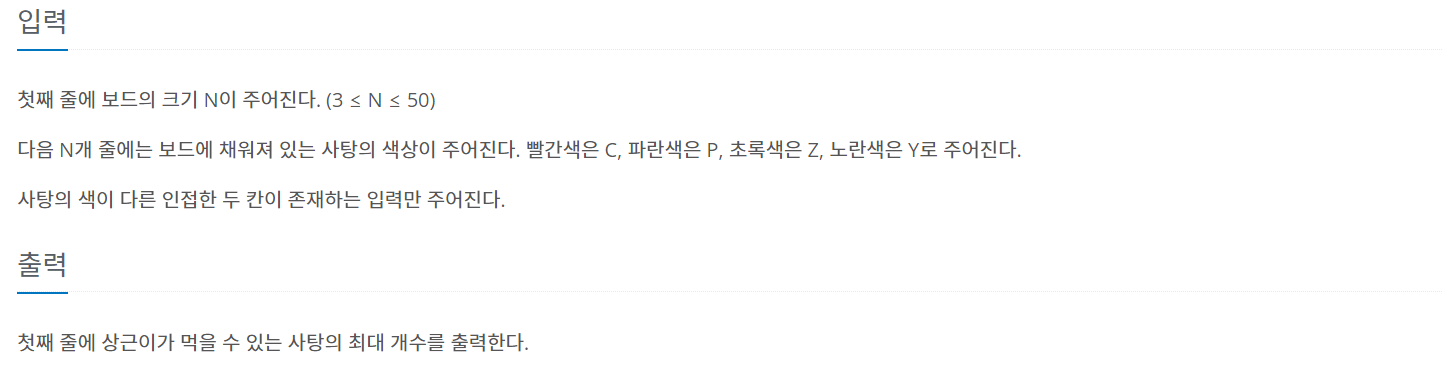

In [4]:
# import sys
# input=sys.stdin.readline

def check(arr):
    n=len(arr)
    answer=1

    for i in range(n):
        # 열 순회하면서 연속되는 숫자 세기
        cnt=1
        for j in range(1, n):
            if arr[i][j] == arr[i][j-1]:
        	# 이전 것과 같다면 cnt에 1 더하기
                cnt += 1
            else:
            # 이전과 다르다면 다시 1로 초기화
                cnt=1
                
            # 비교해서 현재 cnt가 더 크다면 answer 갱신하기
            if cnt > answer:
                answer = cnt

        # 행 순회하면서 연속되는 숫자 세기
        cnt=1
        for j in range(1, n):
            if arr[j][i] == arr[j-1][i]:
        	# 이전 것과 같다면 cnt에 1 더하기
                cnt += 1
            else:
            # 이전과 다르다면 다시 1로 초기화
                cnt=1
                
            # 비교해서 현재 cnt가 더 크다면 answer 갱신하기
            if cnt > answer:
                answer = cnt

    return answer

n=int(input())
arr=[list(input()) for _ in range(n)]
answer=0

for i in range(n):
    for j in range(n):
        # 열 바꾸기
        if j+1 < n:
        	# 인점한 것과 바꾸기
            arr[i][j], arr[i][j+1] = arr[i][j+1], arr[i][j]
            
            # check는 arrd에서 인점한 것과 바꿨을 때 가장 긴 연속한 부분을 찾아내는 함수이다
            temp=check(arr)

            if temp > answer:
                answer = temp
               
            # 바꿨던 것을 다시 원래대로 돌려놓기
            arr[i][j], arr[i][j+1] = arr[i][j+1], arr[i][j]

        # 행 바꾸기
        if i+1 < n:
        	# 인점한 것과 바꾸기
            arr[i][j], arr[i+1][j] = arr[i+1][j], arr[i][j]
            
            # check는 arrd에서 인점한 것과 바꿨을 때 가장 긴 연속한 부분을 찾아내는 함수이다
            temp=check(arr)

            if temp > answer:
                answer = temp
            
            # 바꿨던 것을 다시 원래대로 돌려놓기
            arr[i][j], arr[i+1][j] = arr[i+1][j], arr[i][j]
            
print(answer)

3
CCP
CCP
PPC
3
